In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_project = pd.read_csv("hotel_bookings.csv")
hotel_cancel = hotel_project[hotel_project["is_canceled"] ==1]


In [3]:
hotel_cancel = pd.DataFrame(hotel_cancel)


In [24]:
hotel_cancel
hotel_cancel['arrival_date_year'] = hotel_cancel['arrival_date_year'].astype('str')
hotel_cancel['month-year'] = hotel_cancel['arrival_date_month'] + '-' + hotel_cancel['arrival_date_year']


In [23]:
hotel_project
hotel_project['arrival_date_year'] = hotel_project['arrival_date_year'].astype('str')
hotel_project['month-year'] = hotel_project['arrival_date_month'] + '-' + hotel_project['arrival_date_year']

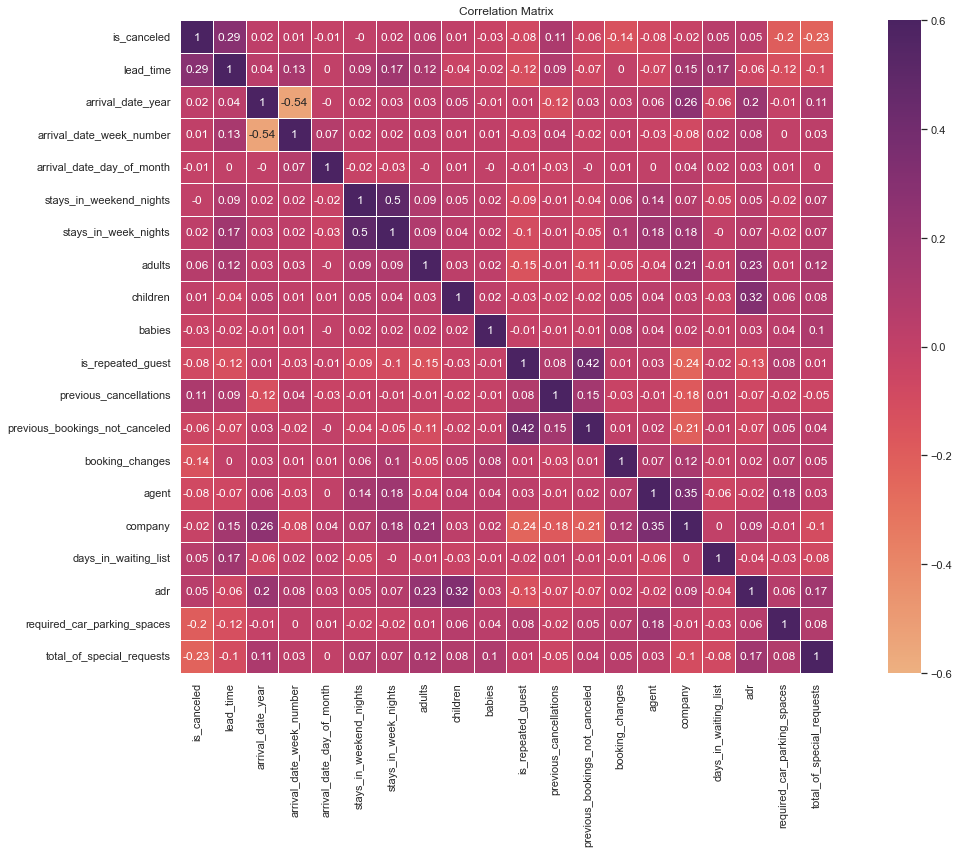

In [7]:
correlation_matrix = np.round(hotel_project.corr(), 2)
correlation_matrix

sns.set(rc={'figure.figsize':(20,12)}) 
color_map = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlation_matrix, annot = True, cmap=color_map, vmin=-0.6, vmax=0.6,linewidths=.5, square=True) 
plt.title('Correlation Matrix')

pass

Najbardziej skorelowane kategorie wzgledem tego, czy rezerwacja została anulowana czy nie:
- lead time (czas od dokonania rezerwacji do dnia, w ktorym pobyt miał się rozpocząć),
- previous cancellation - informacja, czy klient dokonywał wcześniej rezerwacji,
- total of special requests,
- required car parking spaces.

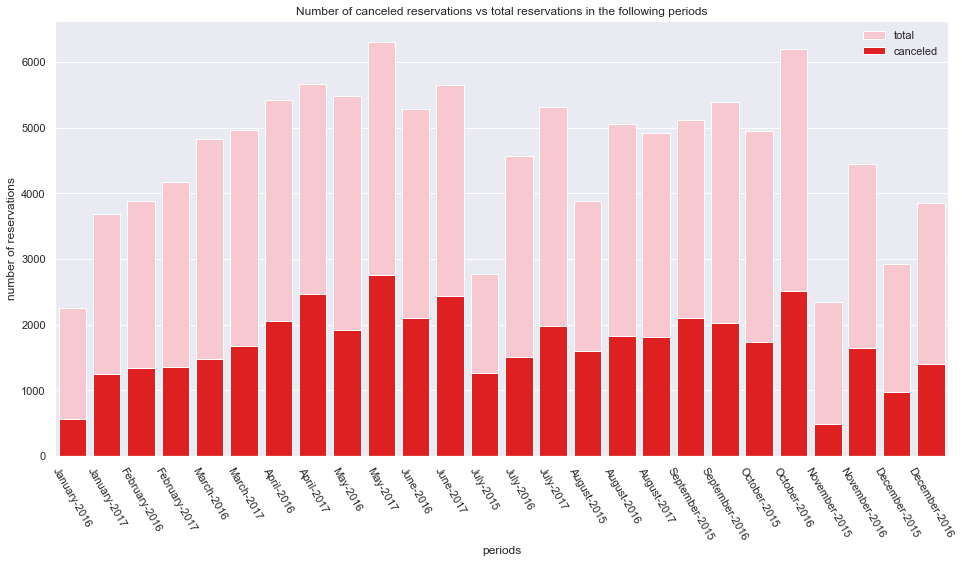

In [25]:
ordered_months = ["January-2016","January-2017","February-2016","February-2017", "March-2016","March-2017", 
                    "April-2016","April-2017","May-2016","May-2017", "June-2016", "June-2017",
                    "July-2015","July-2016","July-2017", "August-2015","August-2016","August-2017", "September-2015", "September-2016", 
                    "October-2015", "October-2016", "November-2015", "November-2016", "December-2015", "December-2016"]
plt.subplots(figsize=(16,8))
sns.countplot(x="month-year",data=hotel_project, color='pink', label='total', order=ordered_months)
sns.countplot(x="month-year",data=hotel_cancel, color='red', label='canceled', order=ordered_months)
plt.xticks(rotation=-60)
plt.title('Number of canceled reservations vs total reservations in the following periods')
plt.xlabel('periods')
plt.ylabel('number of reservations')
plt.legend(frameon=False)



In [122]:
rok = hotel_project.groupby(['arrival_date_year']).agg({'arrival_date_year':'count'})
rok = pd.DataFrame(rok)
rok = rok.rename(columns={"arrival_date_year":"number of reservations"})
rok['%'] = round((rok['number of reservations']/(rok['number of reservations']).sum())*100,2)
rok

,number of reservations,%
arrival_date_year,,
2015,21996,18.42
2016,56707,47.50
2017,40687,34.08


In [124]:
rok_canceled = hotel_cancel.groupby(['arrival_date_year']).agg({'arrival_date_year':'count'})
rok_canceled - pd.DataFrame(rok_canceled)
rok_canceled = rok_canceled.rename(columns={"arrival_date_year":"number of canceled reservations"})
rok_canceled['%'] = round((rok_canceled['number of canceled reservations']/(rok_canceled['number of canceled reservations']).sum())*100,2)
rok_canceled

,number of canceled reservations,%
arrival_date_year,,
2015,8142,18.41
2016,20337,45.99
2017,15745,35.60


Najwięcej dokonanych rezerwacji było w 2016r - 56707. Stanowiło to 47,5% wszystkich rezerwacji dokonanych w badanym okresie.
W tym samym roku dokonano rownież najwięcej anulacji rezerwacji - 20337. Stanowiło to 45,99% wszystkich anulacji w badanym okresie.


Text(0, 0.5, 'Number of cancelations')

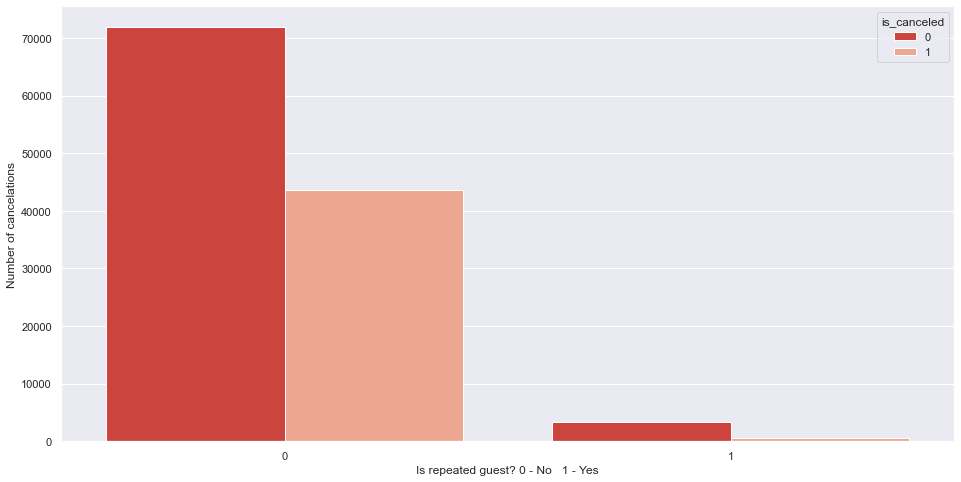

In [163]:
plt.subplots(figsize=(16,8))
color = sns.color_palette("flare", as_cmap=False)
sns.countplot(x="is_repeated_guest",hue="is_canceled", data=hotel_project, palette='Reds_r')
plt.xlabel('Is repeated guest? 0 - No   1 - Yes')
plt.ylabel('Number of cancelations')



In [141]:
repeated_guest = hotel_project.groupby(['is_repeated_guest']).agg({'is_repeated_guest':'count'})
repeated_guest = pd.DataFrame(repeated_guest)
repeated_guest = repeated_guest.rename(columns={'is_repeated_guest':'count of reservations'})
repeated_guest['%'] = round(repeated_guest['count of reservations']/(repeated_guest['count of reservations'].sum())*100,2)
repeated_guest

,count of reservations,%
is_repeated_guest,,
0,115580,96.81
1,3810,3.19


In [151]:
guest_cancel = hotel_project.groupby(['is_canceled']).agg({'is_repeated_guest':'sum'})
guest_cancel = pd.DataFrame(guest_cancel)
guest_cancel = guest_cancel.rename(columns={'is_repeated_guest':'number of reservations by repeated guests'})
guest_cancel['%'] = round(guest_cancel['number of reservations by repeated guests']/(guest_cancel['number of reservations by repeated guests'].sum())*100,2)
guest_cancel

,number of reservations by repeated guests,%
is_canceled,,
0,3258,85.51
1,552,14.49


Najwięcej rezerwacji dokonanych zostało przez nowych gości - prawie 97%.

Wśród gości, którzy po raz kolejny chcieli dokonać rezerwacji, prawie 15% z nich zrezygnowało w międzyczasie z ponownego pobytu w hotelu.

,count of guests
deposit_type,
No Deposit,29694
Non Refund,14494
Refundable,36


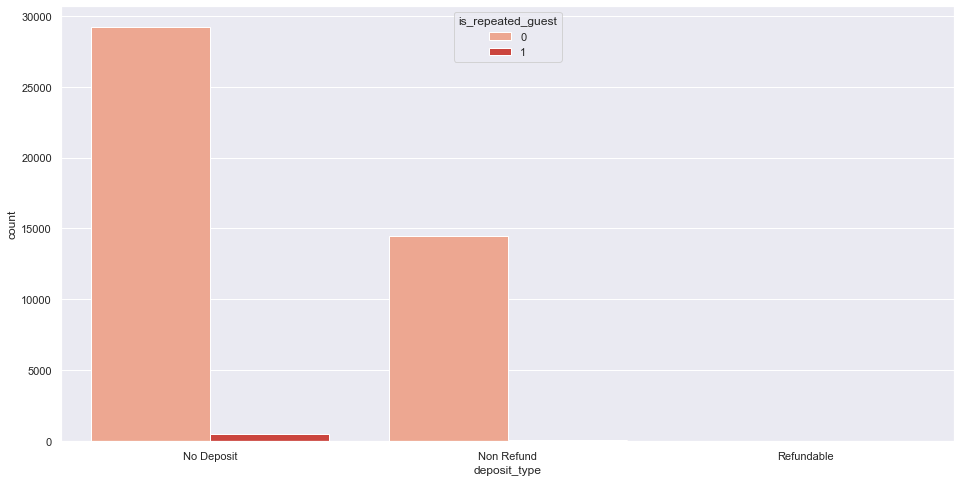

In [164]:
plt.subplots(figsize=(16,8))
sns.countplot(x='deposit_type', data=hotel_cancel, hue='is_repeated_guest', palette='Reds')

depozyty = hotel_cancel.groupby(['deposit_type']).agg({'is_repeated_guest':'count'})
depozyty = depozyty.rename(columns={'is_repeated_guest':'count of guests'})
depozyty

Jak pokazują powyższe dane, prawie 30 tys. anulowanych rezerwacji, nie było opłacone żadną zaliczką.
ok. 14,5 tysiąca anulowanych rezerwacji zostało wcześniej zadatkowanych. Jedynie w 36 przypadkach, zaliczka ta została zwrócona dla klienta.